Vamos a tratar de <b>ajustar los hiperparámetros</b> sobre un modelo de rgresión con redes neuronales densas.

In [ ]:
# Importación de librerias
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
tf.keras.utils.set_random_seed(0)

### Abalone dataset

Los abalones son caracoles marinos que pueden encontrarse alrededor de las costas de todos los contientes.

En este notebook vamos a predecir la edad de abalones con medidas fisicas. (mediante datos tabulares). Vamos a realizar un problema de regresión, pues vamos a predecir la edad.

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Universidad /4) MÁSTER EN DATA SCIENCE, BIG DATA & BUSINESS ANALYTICS (UCM)/MÓDULO 11_DEEP LEARNING/Fundamentals (MLP: Redes Neuronales Densas)/Datos/abalone_train.csv',
                       names = ['Length','Diameter','Height','Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight','Age'])
df_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


In [ ]:
df_train.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,3320.000000,3320.000000,3320.000000,3320.000000,3320.000000,3320.000000,3320.000000,3320.000000
mean,0.522693,0.406575,0.139271,0.824734,0.357705,0.180162,0.237921,9.896988
std,0.121164,0.100120,0.042708,0.491182,0.222223,0.110182,0.140261,3.205654
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.345000,0.115000,0.436375,0.181500,0.092000,0.127375,8.000000
50%,0.540000,0.425000,0.140000,0.795250,0.335500,0.170750,0.230000,9.000000
75%,0.615000,0.480000,0.165000,1.150000,0.504500,0.253125,0.325000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,27.000000


In [ ]:
y_train = df_train.pop('Age')
X_train =df_train.copy()

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/Universidad /4) MÁSTER EN DATA SCIENCE, BIG DATA & BUSINESS ANALYTICS (UCM)/MÓDULO 11_DEEP LEARNING/Fundamentals (MLP: Redes Neuronales Densas)/Datos/abalone_test.csv',
                      names=["Length", "Diameter", "Height", "Whole weight", "Shucked weight",
           "Viscera weight", "Shell weight", "Age"])

y_test = df_test.pop('Age')
X_test = df_test.copy()

In [ ]:
print(f'X_train shpae: {X_train.shape}, X_test shape: {X_test.shape}')

X_train shpae: (3320, 7), X_test shape: (850, 7)


In [ ]:
num_features = X_train.shape[1]
print(num_features)

7


### 1. Regression Losses (funciones de perdida en regresión)
* <b>Mean Squared Error (MSE)</b>: Penaliza mucho cuando te desvias demasiado. Suele ser la más usada. Es útil para datasets con presencia de outliers.

```python
tf.keras.losses.MAE
```

```python
model.compile(loss='mse') or model.compile(loss=tf.keras.losses.MSE)
```

* <b>Mean Absolute Error (MAE)</b>: Penaliza menos el error de predicción. Menos usado que el MSE. Suele usarser cuando el superior nos dice de usarlo (cuando hay demasiados outliers), aun que lo suyo sería realizar una limpieza de datos correcta.
```python
tf.keras.MAE
```

```python
model.compile(loss='mae') or model.compile(loss=tf.keras.losses.MAE)

### Pregunta 1: Crea una nueva red con al menos una capa oculta

* Podemos usar la <b>Functional API</b>

Necesitas iniciarte con un input data:

```python
inputs = keras.Input(shape=(...,))
layer_1 = layers.Dense(...)(inputs)
```

y los outputs de la red

```python
outputs = layers.Dense(...)(previos_layer)
model = keras.Model(inputs = inputs, outputs=outputs)
```

* O podemos usar la <b>Sequential API</b>

```python
model = keras.Sequential(name='example_model')
model.add(layers.Dense(..., input_shape=(8,)))
model.add(...
```

Además, tamiben es posible introducir los metodos regularizados *(es decir, métodos anti overfitting)* como Dropout layer de la siguiente forma:

```python
tf.keras.layers.Dropout()
```

con <b>Functional API</b>

```python
next_layer = layers.Dropout(0.4)(prev_layer)
```

con <b>Sequential API</b>

```python
model.add(layers.Dropout(0.4))
```

In [ ]:
# 1. Forma Secuencial
# model = keras.Sequential()
# model.add(layers.Dense(16,input_shape(num_features,),activation='relu'))
# model.add(layers.Dense(1,activation='linear'))


In [ ]:
# 2. Forma Funcional, más limpia y flexible
# Definimos la capa de input
inputs = keras.Input(shape=(num_features,))

# Construimos la capa oculta 1 (layer_1)
x = layers.Dense(16,activation='relu', name='layer_1')(inputs)

# Definimos el ouput
outputs = layers.Dense(1,activation='linear')(x)

# Creamos el modelo especifico con los inputs y los outputs
model_1 = keras.Model(inputs=inputs,outputs=outputs, name='functional_model')

# Sumario del modelo
model_1.summary()

Model: "functional_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 16)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 145 (580.00 B)

 Trainable params: 145 (580.00 B)

 Non-trainable params: 0 (0.00 B)

<b> Early stopping callvack </b>: Cuando existe overfitting, utilizamos *callbacks.*  El early stopping interrumpe en eltrenamiento antes de completar todas las épocas si el modelo deja de mejorar en un conjunto de validación.

``` python
early_stopping = keras.callbacks.EarlyStopping( # crea una callback que detiene el entrenamiento
    monitor="", # Indica la métrica que se va ha onservar
    patience=..., # Número de épocas que se esperan sin mejorar antes de detener el entrenamiento
    mint_delta=..., # Minima mejora requerida en la métrica
    restore_best_weights =..., # Si es True, restaura los pesos del modelo en el punto donde tuvo la mejor métrica

)
```

In [ ]:
# Early stopping callback
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=12,
    restore_best_weights =True,

)

In [ ]:
# Compilamos el modelo
model_1.compile(
    optimizer='adam',
    loss='mse'
)

# Fiteamos el modelo
history_1 = model_1.fit(
    X_train,
    y_train,
    epochs=50,
    validation_split=0.2,
    batch_size=32,
    callbacks=early_stopping
)

Epoch 1/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 111.1950 - val_loss: 95.3320
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 86.7016 - val_loss: 70.6571
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 62.2783 - val_loss: 46.7921
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 39.4897 - val_loss: 27.4822
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.3191 - val_loss: 15.7057
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.7739 - val_loss: 10.5793
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.0809 - val_loss: 8.9796
Epoch 8/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.0930 - val_loss: 8.5481
Epoch 9/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.8591 - val_loss: 8.3744
Epoch 10/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.7406 - val_loss: 8.2371
Epoch 11/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.6159 - val_loss: 8.0929
Epoch 12/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.

In [ ]:
def show_loss_evolution(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(12,6))

  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.plot(hist['epoch'],hist['loss'],label='Train Error')
  plt.plot(hist['epoch'],hist['val_loss'],label='Val Error')
  plt.grid()
  plt.legend()
  plt.show()


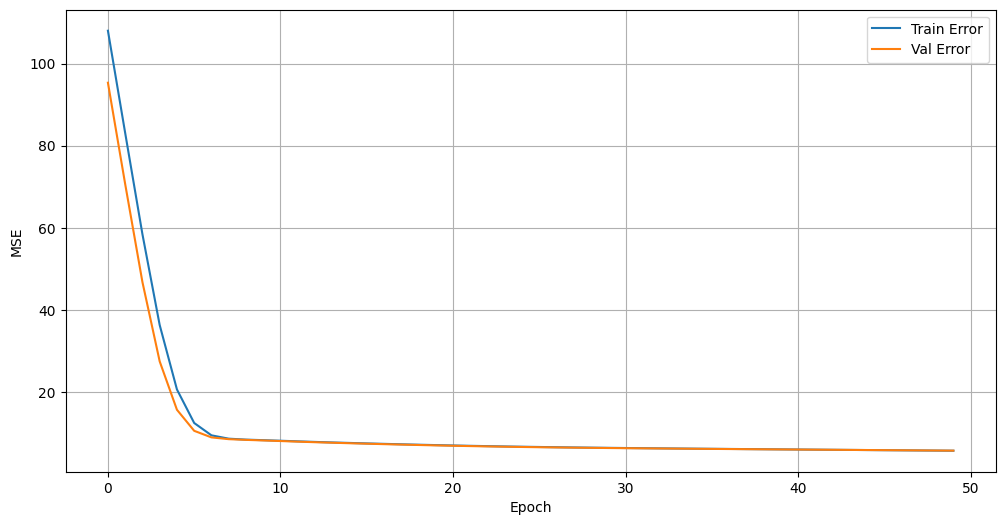

In [ ]:
show_loss_evolution(history_1)

In [ ]:
results = model_1.evaluate(X_test, y_test, verbose=1)
print('Test Loss:', results)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.7555 
Test Loss: 6.3180832862854


No hay overfitting:

* Ambas curvas (Train y Val) bajan juntas rápidamente al inicio.

* Luego se mantienen casi iguales y planas después de unas pocas épocas.

* No hay separación significativa entre ellas.

### Pregunta 2: Normalizamos los inputs y entrenamos el mismo modelo

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)
print('X_train mu, sigma', X_train_norm.mean(0), X_train_norm.std(0))
print('X_test mu, sigma', X_test_norm.mean(0), X_test_norm.std(0))


X_train mu, sigma [ 2.77689518e-16  4.65491099e-17  2.50402109e-16 -2.81434849e-16
  2.18299274e-16  1.77100637e-16 -1.05404306e-16] [1. 1. 1. 1. 1. 1. 1.]
X_test mu, sigma [-7.31441052e-17 -3.53181536e-16  2.81082347e-16 -9.61322525e-17
  1.02401747e-16  2.82127263e-17 -1.46288210e-16] [1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# Compilamos el modelo
model_1.compile(
    optimizer='adam',
    loss='mse'
)

# Fiteamos el modelo
history_2 = model_1.fit(
    X_train_norm,
    y_train,
    epochs=50,
    validation_split=0.2,
    batch_size=32,
    callbacks=early_stopping
)

Epoch 1/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 71.6680 - val_loss: 48.8909
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 44.1349 - val_loss: 41.8367
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38.5678 - val_loss: 38.9100
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35.8273 - val_loss: 36.4233
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 33.4584 - val_loss: 34.0206
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31.1989 - val_loss: 31.6036
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28.9799 - val_loss: 29.1574
Epoch 8/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26.7095 - val_loss: 26.5229
Epoch 9/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24.2231 - val_loss: 23.4571
Epoch 10/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.1961 - val_loss: 19.2838
Epoch 11/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.8835 - val_loss: 14.4103
Epoch 12/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

In [ ]:
results = model_1.evaluate(X_test_norm, y_test, verbose=1)
print('Test Loss:', results)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8428 
Test Loss: 5.438124656677246


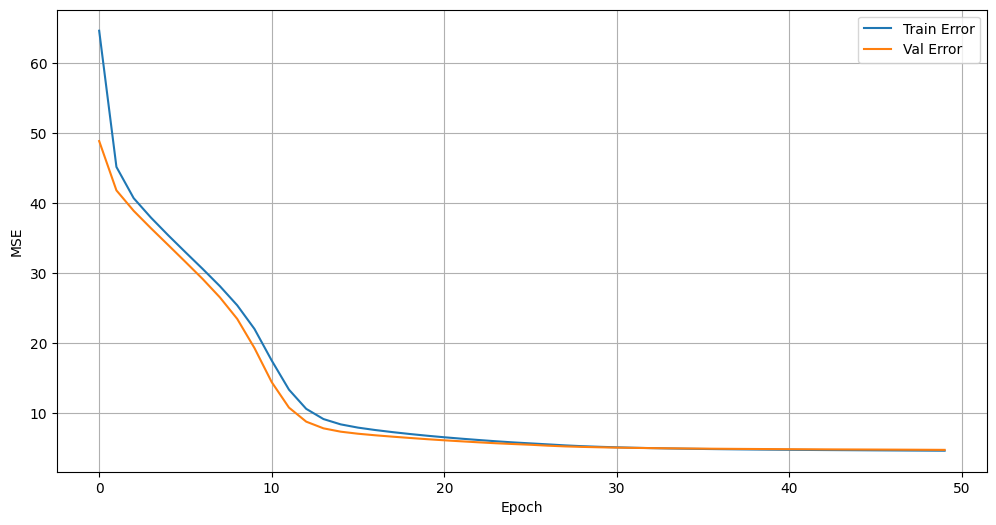

In [ ]:
show_loss_evolution(history_2)

Puesto que hemos aplicado normalización, el modelo_1 aplicado a los datos normalziados ha reducido el riesgo de overfittig.

* Por un lado, el test loss del sgeundo modelo es mas bajo, por lo tanto, primer indicador de que es mejor.

* Por el otro, ambas curvas del segundo modelo son parejas, por lo tanto no existe overfitting.

### 2. Optimizadores:

* [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD): Descenso del gradiente estocástico con momento (*momentum*).
```python
tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0.0, nesterov=False, name='SGD', **kwargs
)
```
Si el parámetro momentum es 0:

```python
w = w - learning_rate * gradient
```
Si usamos momentum:
```python
velocity = momentum * velocity - learning_rate * g
w = w + velocity
```
* RMSprop: Propagación de la raíz del promedio cuadrático (Root Mean Square Propagation).

```python
tf.keras.optimizers.RMSprop(
    learning_rate=0.001, rho=0.9, momentum=0.0, epsilon=1e-07, centered=False,
    name='RMSprop', **kwargs
)
````
* Adam: Estimación adaptativa de momentos (Adaptive Moment Estimation), una mejora del algoritmo RMSProp.

```python
tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam', **kwargs
)
```

```python
model.compile(loss='mse', optimizer='adam')
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
````


### Pregunta 3: Entrena el mismo modelo con los distintos optimizadores

In [ ]:
# 1. SGD
# Compilamos el modelo
model_1.compile(
    optimizer='SGD',
    loss='mse'
)

# Fiteamos el modelo
history_3 = model_1.fit(
    X_train,
    y_train,
    epochs=50,
    validation_split=0.2,
    batch_size=32,
    callbacks=early_stopping
)

Epoch 1/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.0211 - val_loss: 6.5074
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8623 - val_loss: 6.2515
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.6181 - val_loss: 6.0673
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4341 - val_loss: 5.8969
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2819 - val_loss: 5.7451
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1448 - val_loss: 5.5929
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0155 - val_loss: 5.4530
Epoch 8/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9036 - val_loss: 5.3336
Epoch 9/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8126 - val_loss: 5.2361
Epoch 10/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7394 - val_loss: 5.1479
Epoch 11/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6805 - val_loss: 5.0753
Epoch 12/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6392 - val_lo

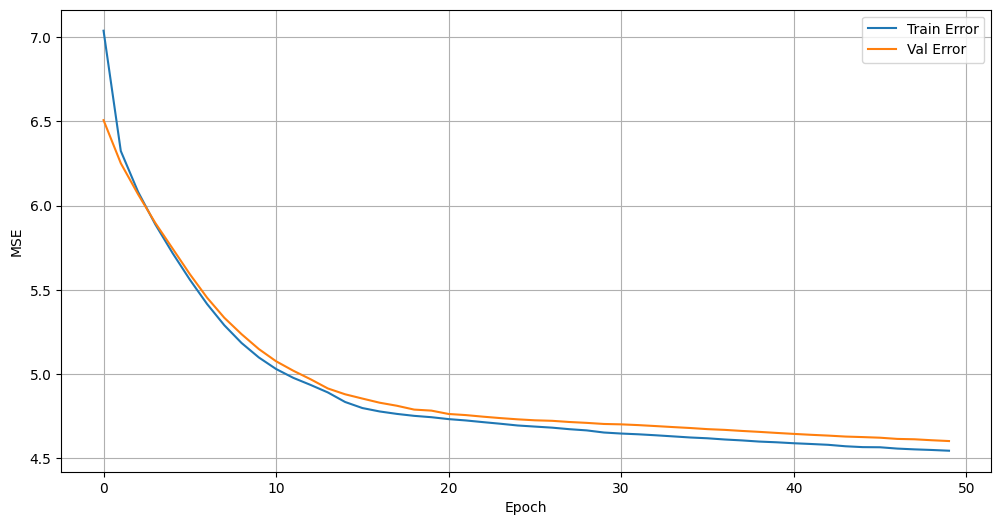

In [ ]:
show_loss_evolution(history_3)

In [ ]:
results = model_1.evaluate(X_test, y_test, verbose=1)
print('Test Loss:', results)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8020 
Test Loss: 5.236477375030518


In [ ]:
# 2. RMSprop
# Compilamos el modelo
model_1.compile(
    optimizer='RMSprop',
    loss='mse'
)

# Fiteamos el modelo
history_4 = model_1.fit(
    X_train,
    y_train,
    epochs=50,
    validation_split=0.2,
    batch_size=32,
    callbacks=early_stopping
)

Epoch 1/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.0248 - val_loss: 4.5807
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.0189 - val_loss: 4.5797
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0170 - val_loss: 4.5796
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0159 - val_loss: 4.5780
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0149 - val_loss: 4.5761
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.0132 - val_loss: 4.5742
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0118 - val_loss: 4.5723
Epoch 8/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.0105 - val_loss: 4.5704
Epoch 9/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.0090 - val_loss: 4.5683
Epoch 10/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0074 - val_loss: 4.5665
Epoch 11/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.0060 - val_loss: 4.5645
Epoch 12/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0044 - val_lo

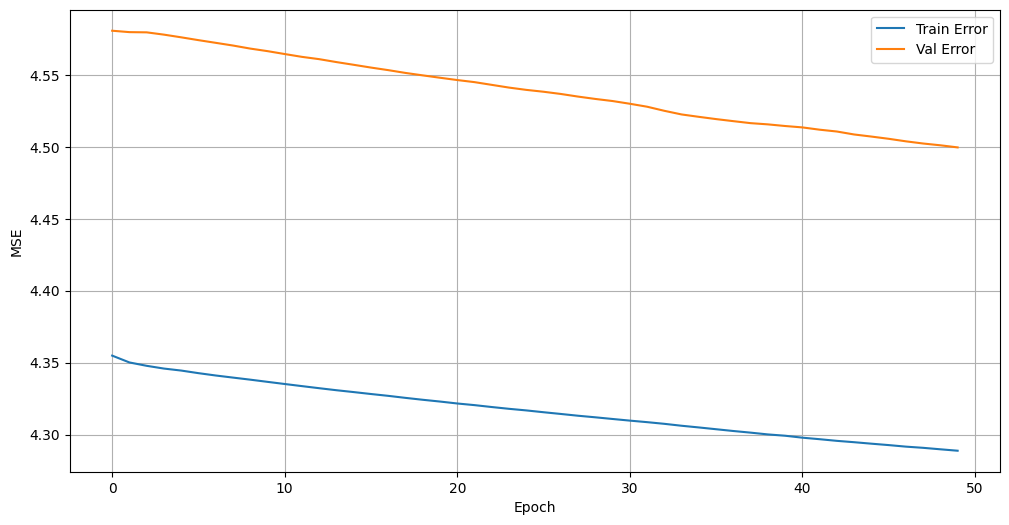

In [ ]:
show_loss_evolution(history_4)

In [ ]:
results = model_1.evaluate(X_test, y_test, verbose=1)
print('Test Loss:', results)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7589 
Test Loss: 5.207412242889404


### Keras Tuner

 [Keras Tuner](https://www.tensorflow.org/tutorials/keras/keras_tuner) es una librería para tuneo de hiperparánetros.


<b> Que es el tuneo de Hiperparámetros </b>

Es el proceos de encontrar el set de hiperparámetros optimos para un modelo de ML para maximizar la performance. Los hiperparámetros se aplican antes del proceso de aprendizaje y influencian como el modelo aprende.

Los hiperparámetros más comunes incluyen:

* arquitectura del modelo: numero de capas y unidades por capa
* paramétros de entrenamiento: learning rate, batch size, dropout rate
* regularización: L1/L2 penalties, early stoppng criteria.

El tuneo manual de los parámetros puede llevarte demasiado tiempo y llevarte hacia resultados no óptimos. Keras Tuner es una libreria que nos facilitia realizar el tuneo hiperparámetros de una forma automaitizada.

<b>Entendiendo las diferentes estrategias de tuneo:</b>

Keras Tuner nos ofrece 4 principales tecnicas de optimización de hiperparámetros:

<b>1- RandomSearch</b>
* Como funciona: Selecciona aleatoriamente muestras del espacio de hiperarámetros
* Pros: Simple, fácilmente paralelizable, no hace suposiciones sobre la importancia de los parámetros
* Cons: Puede ser ineficiente en espacios de búsqueda grandes.
* Mejor para: exploración incial o cuando se sabe pcoo sobre el espacio de hiperparámetros.

<b>2- Hyperband </b>
* Como funciona: Asigna recursos (epochs) de forma dinámica, descartando rápidamente los modelos con bajo rendimiento.
* Pros: Más eficiente que la búsqueda aleatoria, especialmente para redes profundas
* Cons: más complejo de configurar correctamente.
* Mejor para: Cuando el entrenamiento es computacionalmente costoso y se quiere equilibrarexploración vs explotación.

<b>3- BayesianOptimizatipon </b>
* Como funciona: construe un modelo de probabilidad de la función objetivo y lo usa para seleccionar hiperparámetros
* Pros: uso más eiciente de los recursos, aprende de evaluaciones previas.
* Cons: más compleo, requiere mayor costo computacional en cada iteración
* Mejor para: cuando la evaluación es costosa y se tiene un espacio de búsqueda moderado.

<b> 4- Sklearn </b>
* Como funciona: interfaz para los métodos de búsqueda de hiperparámetros de *scikit-learn*.
* Pros: API familiar para quienes provienen de *scikit-learn*.
* Cons: limitado a las capacidades de ajuste de hiperparámetors de *scikit-learn*.
* Mejor para: cuando se integra con *pipelines* existentes de *scikit-learn*.


In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 6.4 MB/s eta 0:00:00


In [ ]:
import kerastuner as kt

/tmp/ipython-input-1654478174.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


 Los **hiperparámetros** son de dos tipos:
1. **Hiperparámetros del modelo**, como el número de unidades, tipo de activación o número de capas ocultas.  
2. **Hiperparámetros del algoritmo**, como la tasa de aprendizaje (*learning rate*) en Adam.

La función de construcción del modelo recibe un argumento `hp` del cual se pueden muestrear (elegir) los hiperparámetros.

```python
def build_model(hp):
  ...
  return model
````
* <b>hp.Int</b> para muestrear un número entero dentro de un rango:

```python
hp.Int('units', min_value=32, max_value=256, step=32, default=64)
```

* <b>hp.Float</b> para muestrear un número decimal dentro de un rango:

```python
hp.Float('dropout', min_value=0.0, max_value=0.1, default=0.005, step=0.05)
```
* <b>hp.Choice</b> para seleccionar valores de una lista:

```python
hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])
````

* [Lista de metodos de hiperparámetros](https://keras-team.github.io/keras-tuner/documentation/hyperparameters/)

In [ ]:
def build_model(hp):
    model = keras.Sequential()
    # Sample different number of layers with hp.Int
    for i in range(hp.Int('num_layers', 1, 3)):
        # Sample different number of layers with hp.Int
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=128,
                                            step=32),
                               activation='relu'))
    # Sample different activation functions with hp.Choice
    model.add(layers.Dense(1, activation=hp.Choice('output_activation', ['relu', 'linear'])))

    # Sample different activation functions with hp.Choice
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mse',
        metrics=['mae'])
    return model

Es aquí cuando escogemos uno de los 4 tuners comentados anteriormente.

In [ ]:
tuner = kt.RandomSearch(build_model,
                        objective='val_loss',
                        max_trials=12, # 12 son pocos intentos
                        directory='my_dir',
                        project_name='intro_to_ky')

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)

In [ ]:
tuner.search(X_train_norm, y_train, epochs =20, validation_split = 0.15, batch_size=32,callbacks=[stop_early])

Trial 12 Complete [00h 00m 09s]
val_loss: 4.6045942306518555

Best val_loss So Far: 4.6045942306518555
Total elapsed time: 00h 01m 45s


In [ ]:
tuner.results_summary()

Results summary
Results in my_dir/intro_to_ky
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 11 summary
Hyperparameters:
num_layers: 2
units_0: 128
output_activation: relu
learning_rate: 0.001
units_1: 96
units_2: 128
Score: 4.6045942306518555

Trial 09 summary
Hyperparameters:
num_layers: 2
units_0: 96
output_activation: linear
learning_rate: 0.001
units_1: 64
units_2: 96
Score: 4.612617492675781

Trial 05 summary
Hyperparameters:
num_layers: 3
units_0: 96
output_activation: linear
learning_rate: 0.01
units_1: 96
units_2: 96
Score: 4.614838123321533

Trial 04 summary
Hyperparameters:
num_layers: 1
units_0: 32
output_activation: linear
learning_rate: 0.01
units_1: 96
units_2: 128
Score: 4.657692909240723

Trial 07 summary
Hyperparameters:
num_layers: 3
units_0: 128
output_activation: linear
learning_rate: 0.01
units_1: 64
units_2: 32
Score: 4.687686443328857

Trial 08 summary
Hyperparameters:
num_layers: 2
units_0: 128
output_activation: linear
learning_rate: